In [4]:
# import os
# print(os.getcwd())

In [5]:
# from src.pre_processing import get_data as g
# from src.plotting import plotter as ptr

In [6]:
# BASE_PATH = os.path.join( os.getcwd(),'datasets' ,'SARBake'  )
# X , Y, cls_train ,cls_test , labels_train , labels_test, class_names  =g.get_full_dataset(BASE_PATH,200,200,80,20)
# print(X.shape)
# print(class_names)

# images = Y[0,0:9,:,:,:]

# # Get the true classes for those images.
# cls_true = cls_test[0:9]

# # Plot the images and labels using our helper-function above.
# ptr.plot_images(images=images, cls_true=cls_true, class_names=class_names ,smooth=False)


# print()

In [7]:
#print(Y.shape)

In [8]:
#print(X.shape)

In [9]:
#print(cls_train.shape)

In [10]:
#print(cls_train)

In [11]:
#print(cls_test)

In [12]:
#print(labels_train.shape)

In [13]:
#print(labels_train)

In [14]:
#print(labels_test)

In [15]:
#len(X)

In [16]:
#len(labels_train)

In [17]:
# #import numpy as np


# idx = np.random.choice(len(labels_train),
#                                size = 16,
#                                replace=False)


# X_dash=X[idx]

In [18]:
# print(X_dash.shape)

In [1]:
from src.tensor_utilities.models import *
from src.tensor_utilities.training import *

import os
from src.pre_processing import get_data as g

<h1> epoch 600 training data 4000 examples </h1>

In [1]:
from src.tensor_utilities.models import *
from src.tensor_utilities.training import *

import os
from src.pre_processing import get_data as g


def build_and_train():
    #os.chdir("../../")
    img_size = 200
    num_channels = 3
    no_training = 400
    no_test = 100
    learning_rate = 0.00001
    no_of_epochs = 600

    BASE_PATH = os.path.join(os.getcwd(), 'datasets', 'SARBake')
    X, Y, cls_train, cls_test, labels_train, labels_test, class_names = g.get_full_dataset(BASE_PATH, img_size, img_size, no_training, no_test)
    num_classes = len(class_names)

    model = Model()

    with model.graph.as_default():
        x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
        y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
        y_true_cls = tf.argmax(y_true, dimension=1)
        model.getsimpleCNNModel(x, num_classes)

        model.getLoss(y_true)

        global_step = tf.Variable(initial_value=0,
                                  name='global_step', trainable=False)

        model.getOptimizer(global_step=global_step, learning_rate=learning_rate)

        y_true_cls = tf.argmax(y_true, dimension=1)

        y_pred_cls = tf.argmax(model.pred, dimension=1)

        correct_prediction = tf.equal(  y_pred_cls , y_true_cls)

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        train = Train(learning_rate=learning_rate, bath_size=32, no_of_epochs=no_of_epochs, graph=model.graph,accuracy=accuracy ,loss=model.loss)

        train.optimize(x, y_true, global_step, model.optimizer, accuracy, X, labels_train, if_restore=True)

        train.print_test_accuracy(x=x,y_true=y_true,y_pred_cls=y_pred_cls,images_test=Y,labels_test=labels_test,cls_test=cls_test,class_names=class_names,show_confusion_matrix=True)














<h1> further increasing epochs doesnot improve accuracy  </h2>

In [23]:
build_and_train()

0
0
0
0
0
0
0
0
0
0


C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Global Step:    100, Training Batch Accuracy:  31.2%
Global Step:    200, Training Batch Accuracy:  71.9%
Global Step:    300, Training Batch Accuracy:  71.9%
Global Step:    400, Training Batch Accuracy:  78.1%
Global Step:    500, Training Batch Accuracy:  90.6%
Global Step:    600, Training Batch Accuracy:  90.6%
1000
Accuracy on Test-Set: 72.9% (729 / 1000)
Confusion Matrix:
[94  0  0  0  4  1  0  0  0  1] (0) 2S1
[ 3 70  1  2 14  0  0  9  0  1] (1) BMP2
[ 0  0 96  0  1  0  1  0  1  1] (2) BRDM2
[ 0 14  2 22 10  0  0  2  0 50] (3) BTR60
[ 2  6  1  2 15  0  0  2  0 72] (4) BTR70
[ 3  0  0  2  0 92  1  0  1  1] (5) D7
[12  0  5  0  0  3 68  0 10  2] (6) T62
[ 1 11  1  1  1  0  0 84  0  1] (7) T72
[ 2  0  1  0  0  3  0  0 93  1] (8) ZIL131
[ 1  0  1  0  0  1  1  0  1 95] (9) ZSU23
(0)(1)(2)(3)(4)(5)(6)(7)(8)(9)


<h1> increasing training data to 6000 and 1100 epochs</h1>

In [25]:
# img_size = 200
# num_channels = 3
# no_training = 400
# no_test = 100
# learning_rate = 0.00001
# no_of_epochs = 600

# num_classes = 10

# model = Model()

# with model.graph.as_default():
#     x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
#     y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
#     y_true_cls = tf.argmax(y_true, dimension=1)
#     model.getsimpleCNNModel(x, num_classes)

#     model.getLoss(y_true)

#     global_step = tf.Variable(initial_value=0,
#                                   name='global_step', trainable=False)

#     model.getOptimizer(global_step=global_step, learning_rate=learning_rate)

#     y_true_cls = tf.argmax(y_true, dimension=1)

#     y_pred_cls = tf.argmax(model.pred, dimension=1)

#     correct_prediction = tf.equal(  y_pred_cls , y_true_cls)

#     accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#     train = Train(learning_rate=learning_rate, bath_size=32, no_of_epochs=no_of_epochs, graph=model.graph,accuracy=accuracy ,loss=model.loss)

#     train.saver.restore(sess=train.session,save_path=train.save_path)




INFO:tensorflow:Restoring parameters from checkpoints/best_validation


In [2]:
def build_restore_train():
    #os.chdir("../../")
    img_size = 100
    num_channels = 3
    no_training = 50
    no_test = 10
    learning_rate = 0.00001
    no_of_epochs = 2

    BASE_PATH = os.path.join(os.getcwd(), 'datasets', 'SARBake')
    X, Y, cls_train, cls_test, labels_train, labels_test, class_names = g.get_datset_in_batch(BASE_PATH, img_size, img_size, no_training, no_test)
    num_classes = len(class_names)

    model = Model()

    with model.graph.as_default():
        x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
        y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
        model.getsimpleCNNModel(x, num_classes)

        model.getLoss(y_true)

        global_step = tf.Variable(initial_value=0,
                                  name='global_step', trainable=False)

        model.getOptimizer(global_step=global_step, learning_rate=learning_rate)

        model.getAccuracy(y_true)
       
        train = Train(learning_rate=learning_rate, bath_size=80, no_of_epochs=no_of_epochs, graph=model.graph,accuracy=model.accuracy ,loss=model.loss)
        
        #train.saver.restore(sess=train.session,save_path=train.save_path)
        
        train.optimize(x, y_true, global_step, model.optimizer, model.accuracy, X, labels_train,Y , labels_test )

        train.print_test_accuracy(x=x,y_true=y_true,y_pred_cls=model.class_predicted,images_test=Y,labels_test=labels_test,cls_test=cls_test,class_names=class_names,show_confusion_matrix=True,show_example_errors=True)










0
0
0
0
0
0
0
0
0
0


C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Global Step:      2, Training Batch Accuracy:  16.2%
100
Accuracy on Test-Set: 15.0% (15 / 100)
Example errors:


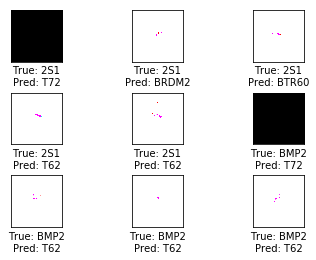

Confusion Matrix:
[5 0 1 1 0 0 2 1 0 0] (0) 2S1
[4 0 0 0 0 0 5 1 0 0] (1) BMP2
[2 0 0 0 0 0 6 2 0 0] (2) BRDM2
[2 0 1 1 1 0 3 1 0 1] (3) BTR60
[5 0 1 0 0 0 3 1 0 0] (4) BTR70
[2 0 1 0 0 0 6 1 0 0] (5) D7
[1 0 0 0 0 0 8 1 0 0] (6) T62
[5 0 0 2 0 0 2 1 0 0] (7) T72
[2 0 1 0 0 0 6 1 0 0] (8) ZIL131
[4 0 0 0 0 0 5 1 0 0] (9) ZSU23
(0)(1)(2)(3)(4)(5)(6)(7)(8)(9)


In [3]:
build_restore_train()

<h1>  image size 100 by 100 9000 training examples and epochs 1000